In [80]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns',None)

In [51]:
data = pd.read_csv("bank-full.csv", delimiter=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [52]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [53]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [54]:
data['education'].unique()


array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [55]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [56]:
data_encoded = pd.get_dummies(data, columns=['job','marital','housing','loan','contact','poutcome','education'],drop_first=False)
data_encoded = data_encoded.replace({True: 1, False: 0})
data_encoded

C:\Users\dulin\AppData\Local\Temp\ipykernel_24896\3708991859.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = data_encoded.replace({True: 1, False: 0})


,age,default,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,education_primary,education_secondary,education_tertiary,education_unknown
0,58,no,2143,5,may,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0
1,44,no,29,5,may,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0
2,33,no,2,5,may,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
3,47,no,1506,5,may,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1
4,33,no,1,5,may,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,17,nov,977,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0
45207,71,no,1729,17,nov,456,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0
45208,72,no,5715,17,nov,1127,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0
45209,57,no,668,17,nov,508,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0


In [57]:
data_encoded['y'] = data_encoded['y'].map({'yes':1, 'no':0})
data_encoded

,age,default,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,education_primary,education_secondary,education_tertiary,education_unknown
0,58,no,2143,5,may,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0
1,44,no,29,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0
2,33,no,2,5,may,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
3,47,no,1506,5,may,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1
4,33,no,1,5,may,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,17,nov,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0
45207,71,no,1729,17,nov,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0
45208,72,no,5715,17,nov,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0
45209,57,no,668,17,nov,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0


In [58]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_encoded['default'] = label_encoder.fit_transform(data_encoded['default'])
data_encoded['month'] = label_encoder.fit_transform(data_encoded['month'])

In [59]:
print(data['y'].value_counts(normalize=True)*100)
data_encoded


y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


,age,default,balance,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,education_primary,education_secondary,education_tertiary,education_unknown
0,58,0,2143,5,8,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0
1,44,0,29,5,8,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0
2,33,0,2,5,8,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
3,47,0,1506,5,8,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1
4,33,0,1,5,8,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,17,9,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0
45207,71,0,1729,17,9,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0
45208,72,0,5715,17,9,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0
45209,57,0,668,17,9,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0


In [60]:
data_encoded['balance'].unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353], dtype=int64)

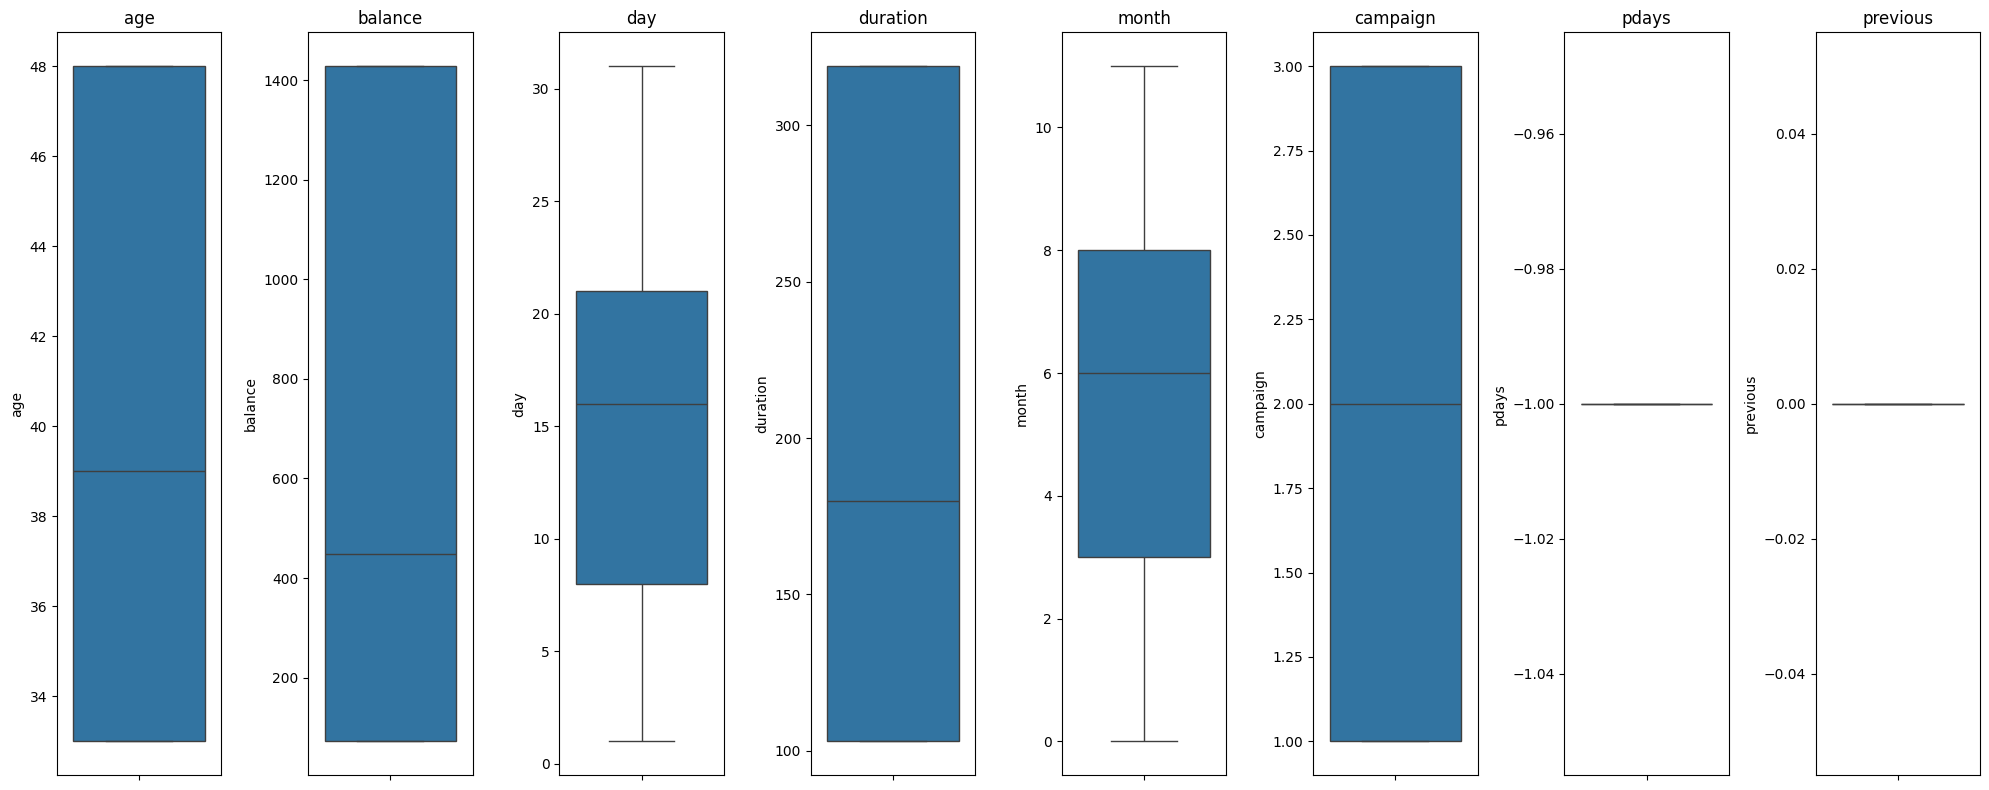

In [71]:
numeric_columns = ['age','balance','day','duration','month','campaign','pdays','previous']

plt.figure(figsize=(20,8))

for i in range(len(numeric_columns)):
    plt.subplot(1, len(numeric_columns), i + 1)
    sns.boxplot(data=data_encoded, y= numeric_columns[i])
    plt.title(numeric_columns[i])

plt.tight_layout()
plt.show()

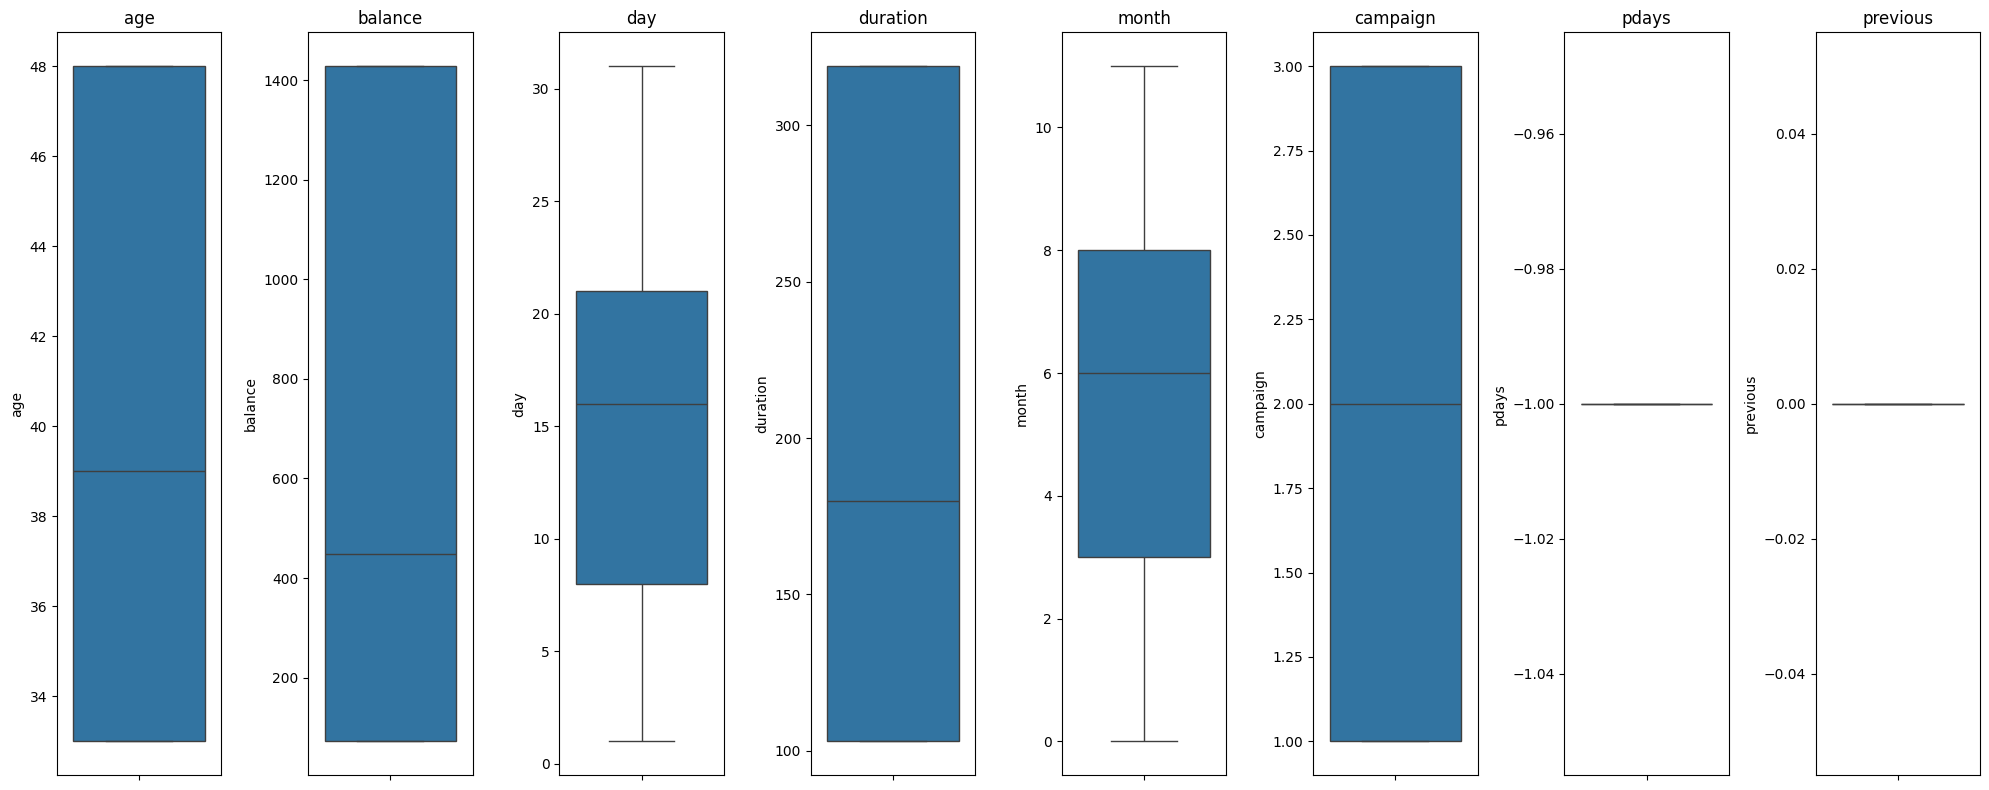

In [72]:
outlier_columns = ['age','balance','duration','campaign','pdays','previous']

for i in range(len(outlier_columns)):
    lower_bound = data_encoded[outlier_columns[i]].quantile(0.25)
    upper_bound = data_encoded[outlier_columns[i]].quantile(0.75)
    data_encoded[outlier_columns[i]] = data_encoded[outlier_columns[i]].clip(lower=lower_bound, upper=upper_bound)

numeric_columns = ['age','balance','day','duration','month','campaign','pdays','previous']

plt.figure(figsize=(20,8))

for i in range(len(numeric_columns)):
    plt.subplot(1, len(numeric_columns), i + 1)
    sns.boxplot(data=data_encoded, y= numeric_columns[i])
    plt.title(numeric_columns[i])

plt.tight_layout()
plt.show()


In [73]:
x = data_encoded.drop(['y'],axis=1)
y = data_encoded['y']
x = x.astype(int)

x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=1)
y_train

22468    0
6896     0
28408    0
8481     0
28753    0
        ..
43723    0
32511    0
5192     0
12172    0
33003    0
Name: y, Length: 36168, dtype: int64

In [74]:
smote = SMOTE(sampling_strategy='minority')
x_train_final,y_train_final = smote.fit_resample(x_train,y_train)

x_train_final.value_counts()
x_train

,age,default,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,education_primary,education_secondary,education_tertiary,education_unknown
22468,48,0,72,22,1,232,2,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0
6896,48,0,330,28,8,103,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0
28408,45,0,300,29,4,203,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0
8481,38,0,72,3,6,319,3,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0
28753,33,0,887,30,4,319,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,48,0,1428,14,8,318,3,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0
32511,34,0,528,17,0,233,2,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0
5192,48,0,1428,21,8,319,3,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0
12172,45,0,1428,20,6,103,3,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1


In [75]:
correlations = data_encoded.corr()
correlations

plt.figure(figsize=(100,100))
sns.heatmap(correlations,annot=True)

<Axes: >

In [76]:
data_encoded.isnull().sum()

age                    0
default                0
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
contact_cellular       0
contact_telephone      0
contact_unknown        0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

In [77]:
random_forrest_model = RandomForestClassifier(n_estimators=100,random_state=1,class_weight='balanced')
random_forrest_model.fit(x_train_final, y_train_final)

random_forrest_model_pred = random_forrest_model.predict(x_test)


In [79]:
print("Accuracy:" , accuracy_score(y_test,random_forrest_model_pred))
print(classification_report(y_test,random_forrest_model_pred))

Accuracy: 0.8884219838549154
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7993
           1       0.53      0.33      0.40      1050

    accuracy                           0.89      9043
   macro avg       0.72      0.64      0.67      9043
weighted avg       0.87      0.89      0.88      9043



In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_final)
X_test_scaled = scaler.transform(x_test)

neural_network_model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') 
])

neural_network_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = neural_network_model.fit(X_train_scaled, y_train_final, epochs=50, batch_size=32, validation_split=0.2, verbose=1)



Epoch 1/50


c:\Users\dulin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1597/1597 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8708 - loss: 0.3041 - val_accuracy: 0.9823 - val_loss: 0.0454
Epoch 2/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9149 - loss: 0.2075 - val_accuracy: 0.9842 - val_loss: 0.0333
Epoch 3/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9188 - loss: 0.1969 - val_accuracy: 0.9850 - val_loss: 0.0297
Epoch 4/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9233 - loss: 0.1904 - val_accuracy: 0.9829 - val_loss: 0.0284
Epoch 5/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9220 - loss: 0.1897 - val_accuracy: 0.9850 - val_loss: 0.0250
Epoch 6/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9220 - loss: 0.1866 - val_accuracy: 0.9856 - val_loss: 0.0241
Epoch 7/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9226 - loss: 0.1855 - val_accuracy: 0.9851 - val_loss: 0.0244
Epoch 8/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9242 - loss: 0.1849 - val_accurac

In [86]:
loss, accuracy = neural_network_model.evaluate(X_test_scaled, y_test)
print("Neural Network Accuracy:", accuracy)
print("Loss:", loss)

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.8961 - loss: 0.2515
Neural Network Accuracy: 0.8958310484886169
Loss: 0.2509717345237732


In [97]:
y_pred_neural_network = neural_network_model.predict(X_test_scaled)
y_pred = (y_pred_neural_network > 0.5).astype(int)

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step


In [98]:
report =  classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7993
           1       0.63      0.26      0.36      1050

    accuracy                           0.90      9043
   macro avg       0.77      0.62      0.65      9043
weighted avg       0.88      0.90      0.88      9043

